# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [11]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to C:\Users\Aseem
[nltk_data]     Mangaokar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv('NEWSAPI_KEY')


In [12]:
# Create a newsapi client
newsapi = NewsApiClient(api_key = api_key)

In [17]:
# Fetch the Bitcoin news articles

headlines_btc = newsapi.get_everything(
                q = 'Bitcoin',
                language = 'en')

In [33]:
# Print number of articles
print(f"Total articles about Bitcoin: {headlines_btc['totalResults']}")


Total articles about Bitcoin: 8169


In [32]:
# Show Sample article
headlines_btc['articles'][0]

{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Khari Johnson',
 'title': 'Why Not Use Self-Driving Cars as Supercomputers?',
 'description': 'Autonomous vehicles use the equivalent of 200 laptops to get around. Some want to tap that computing power to decode viruses or mine bitcoin.',
 'url': 'https://www.wired.com/story/use-self-driving-cars-supercomputers/',
 'urlToImage': 'https://media.wired.com/photos/60f081b4c147fe7a1a367362/191:100/w_1280,c_limit/Business-Autonomous-Vehicles-Supercomputers-1201885684.jpg',
 'publishedAt': '2021-07-19T11:00:00Z',
 'content': 'Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars]'}

In [34]:
# Fetch the Ethereum news articles
headlines_eth = newsapi.get_everything(
                q = 'Ethereum',
                language = 'en')

In [39]:
# Print number of articles
print(f"Total articles about Ethereum: {headlines_eth['totalResults']}")

Total articles about Ethereum: 2374


In [40]:
# show sample article
headlines_eth['articles'][0]

{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Connie Loizos',
 'title': 'Crypto investors like Terraform Labs so much, they’re committing $150 million to its ‘ecosystem’',
 'description': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote about in May. Often, these technologies are seen as so prom…',
 'url': 'http://techcrunch.com/2021/07/16/crypto-investors-like-terraform-labs-so-much-theyre-committing-150-million-to-its-ecosystem/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/06/GettyImages-1174590894.jpg?w=667',
 'publishedAt': '2021-07-16T16:00:55Z',
 'content': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars]'}

In [41]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in headlines_btc['articles']:
    try:
        text = article['content']
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        btc_sentiments.append({
            
            'Compound': compound,
            'Positive': pos,
            'Negative': neg,
            'Neutral': neu,
            'Text': text
        })
        
    except AttributeError:
        pass
    
btc_df = pd.DataFrame(btc_sentiments)

columns = ['Compound', 'Positive', 'Negative', 'Neutral', 'Text']
btc_df = btc_df[columns]

btc_df.head()

,Compound,Positive,Negative,Neutral,Text
0,0.6908,0.178,0.000,0.822,"Like Dogecoin devotees, the mayor of Reno, and..."
1,-0.5719,0.111,0.184,0.705,Filed under:\r\nThe supply chain attack has re...
2,-0.6124,0.000,0.143,0.857,image copyrightGetty Images\r\nThe gang behind...
3,0.7264,0.164,0.000,0.836,While retail investors grew more comfortable b...
4,0.2732,0.097,0.000,0.903,"As longtime TechCrunch readers know well, Mich..."


In [43]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in headlines_eth['articles']:
    try:
        text = article['content']
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        eth_sentiments.append({
            
            'Compound': compound,
            'Positive': pos,
            'Negative': neg,
            'Neutral': neu,
            'Text': text
        })
        
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sentiments)

columns = ['Compound', 'Positive', 'Negative', 'Neutral', 'Text']
eth_df = eth_df[columns]

eth_df.head()

,Compound,Positive,Negative,Neutral,Text
0,0.3612,0.075,0.000,0.925,There are many blockchain platforms competing ...
1,0.7264,0.164,0.000,0.836,While retail investors grew more comfortable b...
2,0.3612,0.110,0.041,0.849,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...
3,0.6369,0.157,0.000,0.843,"""Anthony Di Iorio, a co-founder of the Ethereu..."
4,0.7717,0.194,0.000,0.806,"Ether holders have ""staked"" more than $13 bill..."


In [44]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.018580,0.055650,0.048850,0.895450
std,0.410904,0.066291,0.053598,0.075186
min,-0.612400,0.000000,0.000000,0.705000
25%,-0.381800,0.000000,0.000000,0.840250
50%,0.000000,0.000000,0.057500,0.907500
75%,0.220025,0.108750,0.077750,0.927750
max,0.726400,0.178000,0.184000,1.000000


In [45]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.235065,0.078650,0.024550,0.896800
std,0.387401,0.068866,0.035195,0.065884
min,-0.381800,0.000000,0.000000,0.782000
25%,0.000000,0.000000,0.000000,0.842750
50%,0.361200,0.077500,0.000000,0.920000
75%,0.528675,0.149250,0.067500,0.925000
max,0.771700,0.194000,0.080000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score (0.079)

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score (max of 0.77)

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score (max of 0.19)

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [46]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [109]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()


# Create a list of stopwords


# Expand the default stopwords list if necessary
sw_addons = {'said', 'sent', 'found', 'like', 'chars', 'including', 'today', 'week', 'reuters', 'char'}

In [110]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z]")
    re_clean = regex.sub(' ', str(text))
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    return tokens

In [111]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df.Text.apply(tokenizer)
btc_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.6908,0.178,0.000,0.822,"Like Dogecoin devotees, the mayor of Reno, and...","[dogecoin, devotee, mayor, reno, leader, el, s..."
1,-0.5719,0.111,0.184,0.705,Filed under:\r\nThe supply chain attack has re...,"[filed, supply, chain, attack, ha, reached, th..."
2,-0.6124,0.000,0.143,0.857,image copyrightGetty Images\r\nThe gang behind...,"[image, copyrightgetty, images, gang, behind, ..."
3,0.7264,0.164,0.000,0.836,While retail investors grew more comfortable b...,"[retail, investor, grew, comfortable, buying, ..."
4,0.2732,0.097,0.000,0.903,"As longtime TechCrunch readers know well, Mich...","[longtime, techcrunch, reader, know, well, mic..."


In [112]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df.Text.apply(tokenizer)
eth_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.3612,0.075,0.000,0.925,There are many blockchain platforms competing ...,"[many, blockchain, platform, competing, invest..."
1,0.7264,0.164,0.000,0.836,While retail investors grew more comfortable b...,"[retail, investor, grew, comfortable, buying, ..."
2,0.3612,0.110,0.041,0.849,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,"[bitcoin, ethereum, yuriko, nakao, ether, over..."
3,0.6369,0.157,0.000,0.843,"""Anthony Di Iorio, a co-founder of the Ethereu...","[anthony, di, iorio, co, founder, ethereum, ne..."
4,0.7717,0.194,0.000,0.806,"Ether holders have ""staked"" more than $13 bill...","[ether, holder, staked, billion, worth, crypto..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [113]:
from collections import Counter
from nltk import ngrams

In [114]:
# Generate the Bitcoin N-grams where N=2
# tokenized Bitcoin articles

btc_tokenized = tokenizer(btc_df.Text.str.cat())
btc_tokenized

['dogecoin',
 'devotee',
 'mayor',
 'reno',
 'leader',
 'el',
 'salvador',
 'aldo',
 'baoicchi',
 'convinced',
 'cryptocurrency',
 'future',
 'ceo',
 'founder',
 'canadian',
 'scooter',
 'maker',
 'daymak',
 'belief',
 'filed',
 'supply',
 'chain',
 'attack',
 'ha',
 'reached',
 'thousand',
 'organization',
 'illustration',
 'alex',
 'castro',
 'verge',
 'three',
 'day',
 'ransomware',
 'attacker',
 'started',
 'holiday',
 'weekend',
 'comprom',
 'image',
 'copyrightgetty',
 'images',
 'gang',
 'behind',
 'colossal',
 'ransomware',
 'attack',
 'ha',
 'demanded',
 'paid',
 'bitcoin',
 'return',
 'universal',
 'decryptor',
 'say',
 'unlock',
 'file',
 'retail',
 'investor',
 'grew',
 'comfortable',
 'buying',
 'cryptocurrencies',
 'bitcoin',
 'ethereum',
 'decentralized',
 'application',
 'world',
 'still',
 'ha',
 'lot',
 'work',
 'come',
 'onboarding',
 'longtime',
 'techcrunch',
 'reader',
 'know',
 'well',
 'michael',
 'arrington',
 'cofounded',
 'techcrunch',
 'crunchbase',
 'well',

In [115]:
# BTC bigrams counter
n = 2
btc_bigram_count = Counter(ngrams(btc_tokenized, n))
print(dict(btc_bigram_count))

{('dogecoin', 'devotee'): 1, ('devotee', 'mayor'): 1, ('mayor', 'reno'): 1, ('reno', 'leader'): 1, ('leader', 'el'): 1, ('el', 'salvador'): 3, ('salvador', 'aldo'): 1, ('aldo', 'baoicchi'): 1, ('baoicchi', 'convinced'): 1, ('convinced', 'cryptocurrency'): 1, ('cryptocurrency', 'future'): 1, ('future', 'ceo'): 1, ('ceo', 'founder'): 1, ('founder', 'canadian'): 1, ('canadian', 'scooter'): 1, ('scooter', 'maker'): 1, ('maker', 'daymak'): 1, ('daymak', 'belief'): 1, ('belief', 'filed'): 1, ('filed', 'supply'): 1, ('supply', 'chain'): 1, ('chain', 'attack'): 1, ('attack', 'ha'): 2, ('ha', 'reached'): 1, ('reached', 'thousand'): 1, ('thousand', 'organization'): 1, ('organization', 'illustration'): 1, ('illustration', 'alex'): 1, ('alex', 'castro'): 1, ('castro', 'verge'): 1, ('verge', 'three'): 1, ('three', 'day'): 1, ('day', 'ransomware'): 1, ('ransomware', 'attacker'): 1, ('attacker', 'started'): 1, ('started', 'holiday'): 1, ('holiday', 'weekend'): 1, ('weekend', 'comprom'): 1, ('comprom'

In [116]:
# Generate the Ethereum N-grams where N=2
# tokenized Ethereum articles

eth_tokenized = tokenizer(eth_df.Text.str.cat())
eth_tokenized

['many',
 'blockchain',
 'platform',
 'competing',
 'investor',
 'developer',
 'attention',
 'right',
 'big',
 'daddy',
 'ethereum',
 'called',
 'ethereum',
 'killers',
 'solana',
 'wrote',
 'retail',
 'investor',
 'grew',
 'comfortable',
 'buying',
 'cryptocurrencies',
 'bitcoin',
 'ethereum',
 'decentralized',
 'application',
 'world',
 'still',
 'ha',
 'lot',
 'work',
 'come',
 'onboarding',
 'bitcoin',
 'ethereum',
 'yuriko',
 'nakao',
 'ether',
 'overtook',
 'bitcoin',
 'number',
 'active',
 'address',
 'network',
 'friday',
 'sign',
 'demand',
 'faltering',
 'world',
 'biggest',
 'cryptocurrency',
 'co',
 'anthony',
 'di',
 'iorio',
 'co',
 'founder',
 'ethereum',
 'network',
 'say',
 'done',
 'cryptocurrency',
 'world',
 'partially',
 'personal',
 'safety',
 'concern',
 'report',
 'bloomberg',
 'story',
 'shared',
 'slashdot',
 'ether',
 'holder',
 'staked',
 'billion',
 'worth',
 'cryptocurrency',
 'ethereum',
 'network',
 'excitement',
 'build',
 'around',
 'overhaul',
 'syste

In [117]:
# ETH bigrams counter
n = 2
eth_bigram_count = Counter(ngrams(eth_tokenized, n))
print(dict(eth_bigram_count))

{('many', 'blockchain'): 1, ('blockchain', 'platform'): 1, ('platform', 'competing'): 1, ('competing', 'investor'): 1, ('investor', 'developer'): 1, ('developer', 'attention'): 1, ('attention', 'right'): 1, ('right', 'big'): 1, ('big', 'daddy'): 1, ('daddy', 'ethereum'): 1, ('ethereum', 'called'): 1, ('called', 'ethereum'): 1, ('ethereum', 'killers'): 1, ('killers', 'solana'): 1, ('solana', 'wrote'): 1, ('wrote', 'retail'): 1, ('retail', 'investor'): 1, ('investor', 'grew'): 1, ('grew', 'comfortable'): 1, ('comfortable', 'buying'): 1, ('buying', 'cryptocurrencies'): 1, ('cryptocurrencies', 'bitcoin'): 2, ('bitcoin', 'ethereum'): 3, ('ethereum', 'decentralized'): 1, ('decentralized', 'application'): 1, ('application', 'world'): 1, ('world', 'still'): 1, ('still', 'ha'): 1, ('ha', 'lot'): 1, ('lot', 'work'): 1, ('work', 'come'): 1, ('come', 'onboarding'): 1, ('onboarding', 'bitcoin'): 1, ('ethereum', 'yuriko'): 1, ('yuriko', 'nakao'): 1, ('nakao', 'ether'): 1, ('ether', 'overtook'): 1, (

In [118]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [119]:
# Use token_count to get the top 10 words for Bitcoin
btc_top10 = token_count(btc_tokenized, 10)
btc_top10

[('bitcoin', 22),
 ('june', 10),
 ('cryptocurrency', 8),
 ('illustration', 6),
 ('world', 5),
 ('seen', 4),
 ('taken', 4),
 ('monday', 4),
 ('losing', 4),
 ('previous', 4)]

In [120]:
# Use token_count to get the top 10 words for Ethereum
eth_top10 = token_count(eth_tokenized, 10)
eth_top10

[('bitcoin', 15),
 ('ethereum', 11),
 ('cryptocurrency', 11),
 ('world', 7),
 ('network', 6),
 ('june', 6),
 ('biggest', 5),
 ('ether', 4),
 ('staff', 4),
 ('losing', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [121]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

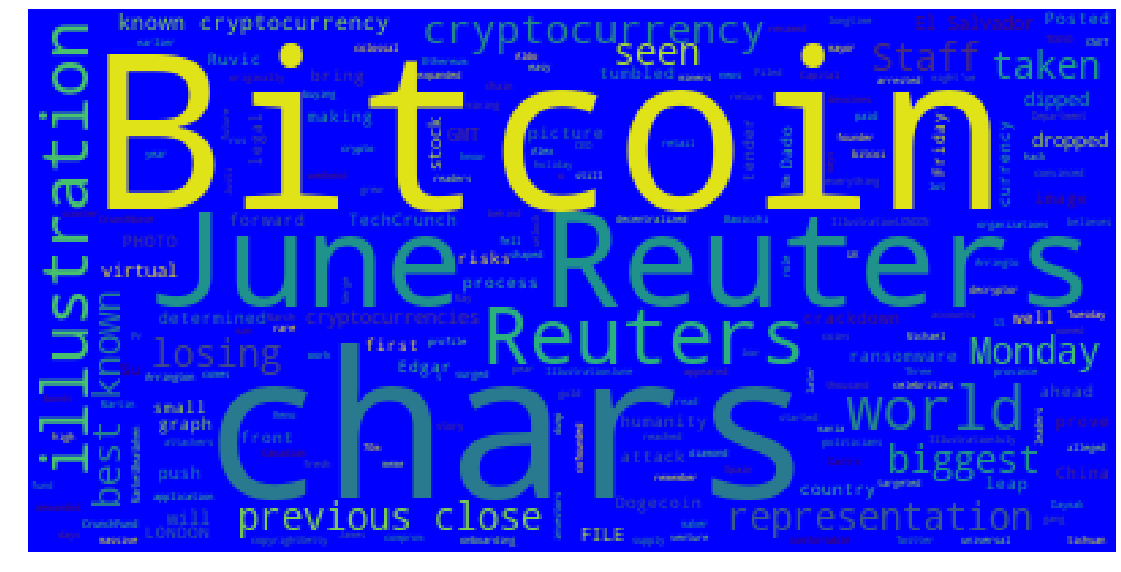

In [122]:
# Generate the Bitcoin word cloud
btc_cloud = WordCloud(background_color = 'blue').generate(btc_df.Text.str.cat())
btc_cloud
plt.axis('off')
plt.imshow(btc_cloud)

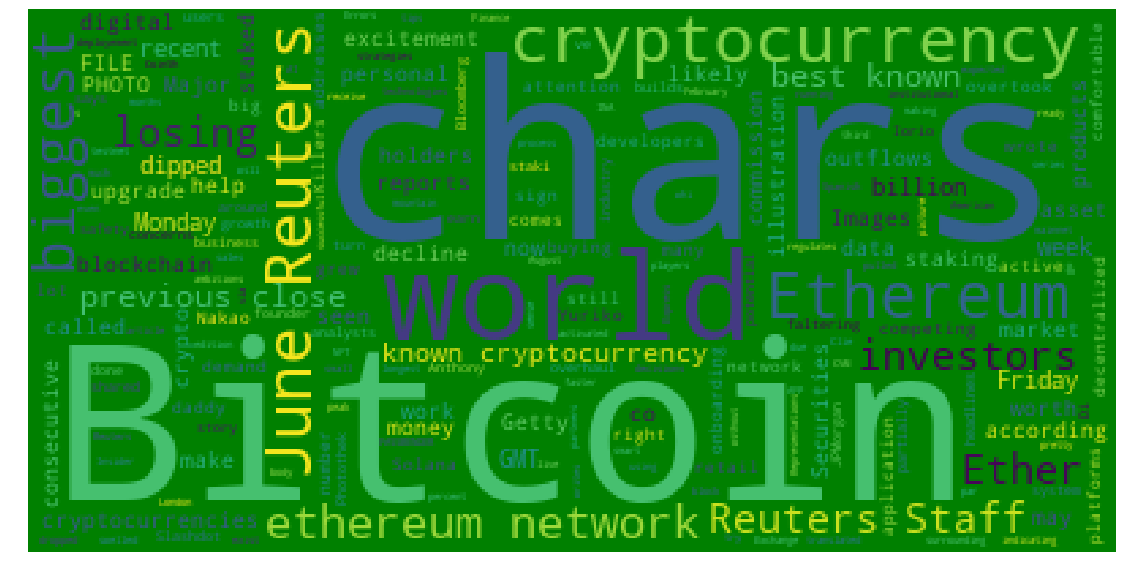

In [123]:
eth_cloud = WordCloud(background_color = 'green').generate(eth_df.Text.str.cat())
eth_cloud
plt.axis('off')
plt.imshow(eth_cloud)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [124]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [125]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [126]:
# Concatenate all of the Bitcoin text together
btc_concat = btc_df.Text.str.cat()
btc_concat

'Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars]Filed under:\r\nThe supply chain attack has reached over a thousand organizations.\r\nIllustration by Alex Castro / The Verge\r\nThree days after ransomware attackers started the holiday weekend by comprom… [+3376 chars]image copyrightGetty Images\r\nThe gang behind a "colossal" ransomware attack has demanded $70m (£50.5m) paid in Bitcoin in return for a "universal decryptor" that it says will unlock the files of all … [+4140 chars]While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars]As longtime TechCrunch readers know well, Michael Arrington cofounded TechCrunch and Crunchbase, as well as the venture fund CrunchFund

In [127]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_concat)
btc_doc

# Add a title to the document
btc_doc.user_data['Title'] = 'Bitcoin NER'

In [128]:
# Render the visualization
displacy.render(btc_doc, style = 'ent')

In [129]:
# List all Entities
for i in btc_doc.ents:
    print(i.text, i.label)

Reno 384
El Salvador 384
Aldo Baoicchi 384
Canadian 381
Daymak 383
Alex Castro 380
The Verge 383
Three days 391
the holiday weekend 391
$70m 394
£50.5m 394
Bitcoin and Ethereum 383
2021 391
Michael Arrington 380
TechCrunch 385
Crunchbase 383
CrunchFund 386
Tuesday 391
2017 391
June 23 391
Reuters 383
El Salvador 384
June 23 391
Reuters 383
El Salvador 384
Pr 380
earlier this year 391
March 15, 2021 391
REUTERS 383
Dado Ruvic/ 380
June 30 391
Reuters 383
June 21 391
Reuters 383
Monday 391
China 384
Sichuan 384
as low as $32,288 394
first 396
June 14, 2021 391
REUTERS 383
Edgar Su/IllustrationJune 25 380
Reuters 383
7.37% 393
32,094.44 394
Monday 391
China 384
June 21 391
Reuters 383
8.57% 393
32,540.35 394
2011 391
Monday 391
3,049.42 394
49.9% 393
Reuters 383
June 21 391
Reuters 383
8.57% 393
32,540.35 394
2011 391
Monday 391
3,049.42 394
Reuters 383
FILE 383
June 7, 2021 391
REUTERS 383
Edgar Su/Illustration/File Photo 380
Reuters 383
Martin/CNET
A 383
UK 384
Spain 384
Twitter 386
202

---

### Ethereum NER

In [130]:
# Concatenate all of the Ethereum text together
eth_concat = eth_df.Text.str.cat()
eth_concat

'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars]While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars]Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther overtook bitcoin in the number of active addresses on its network on Friday, a sign that demand is faltering for the world\'s biggest cryptocurrency as its co… [+2727 chars]"Anthony Di Iorio, a co-founder of the Ethereum network, says he\'s done with the cryptocurrency world, partially because of personal safety concerns," reports Bloomberg, in a story shared by Slashdot… [+1550 chars]Ether holders have "staked" more than $13 billion worth of the cryptocurrency on the ethereum 2.0 network, as excitement builds around th

In [131]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_concat)
eth_doc

# Add a title to the document
eth_doc.user_data['Title'] = 'Ethereum NER'

In [132]:
# Render the visualization
displacy.render(eth_doc, style = 'ent')

In [133]:
# List all Entities
for i in eth_doc.ents:
    print(i.text, i.label)

Ethereum 380
Ethereum Killers 388
Solana 380
Bitcoin and Ethereum 383
2021 391
Ethereum
 383
Yuriko Nakao 380
Friday 391
Di Iorio 380
Ethereum 380
Bloomberg 380
Slashdot 381
more than $13 billion 394
2.0 397
Photothek 380
more than $13 billion 394
2.0 397
$40 billion 394
2025 391
JPMorgan 383
NFT 383
90 percent 393
recent weeks 391
recent months 391
+2313 chars]Personal Finance Insider 383
American Express 383
Spanish 381
AI 383
The Securities and Exchange Commission 383
Reuters 383
June 25 391
Reuters 383
7.37% 393
32,094.44 394
Friday 391
2,554.88 394
50.5 397
AFP 383
Getty Images
Investors 383
the third week 391
February 2018 391
London 384
Ethereum 380
12 965 000 397
August 3-5, 2021 391
Clie 380
Reuters 383
June 25 391
Reuters 383
8.51% 393
31,699.83 394
22:04 GMT 392
Friday 391
2,937.27 394
21 397
Reuters 383
8.57% 393
32,540.35 394
2011 391
Monday 391
3,049.42 394
49.9% 393
Reuters 383
June 21 391
Reuters 383
8.57% 393
32,540.35 394
2011 391
Monday 391
3,049.42 394
Reuters 383
F

---